# Módulo 10 tarefa 2

Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

1) Com o que você viu em aula, faça uma análise das variáveis qualitativas (posse de imóvel e posse de veículo) para verificar se são boas preditoras de *renda*. Alguma delas parece discriminar *renda* de forma estatisticamente significante?

### Carregando os pacotes:

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Carregando e visualizando o banco de dados:

In [16]:
df = pd.read_csv('previsao_de_renda.csv')
df.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


### Testando com Boxplot:
Visualiza a distribuição da renda para cada categoria

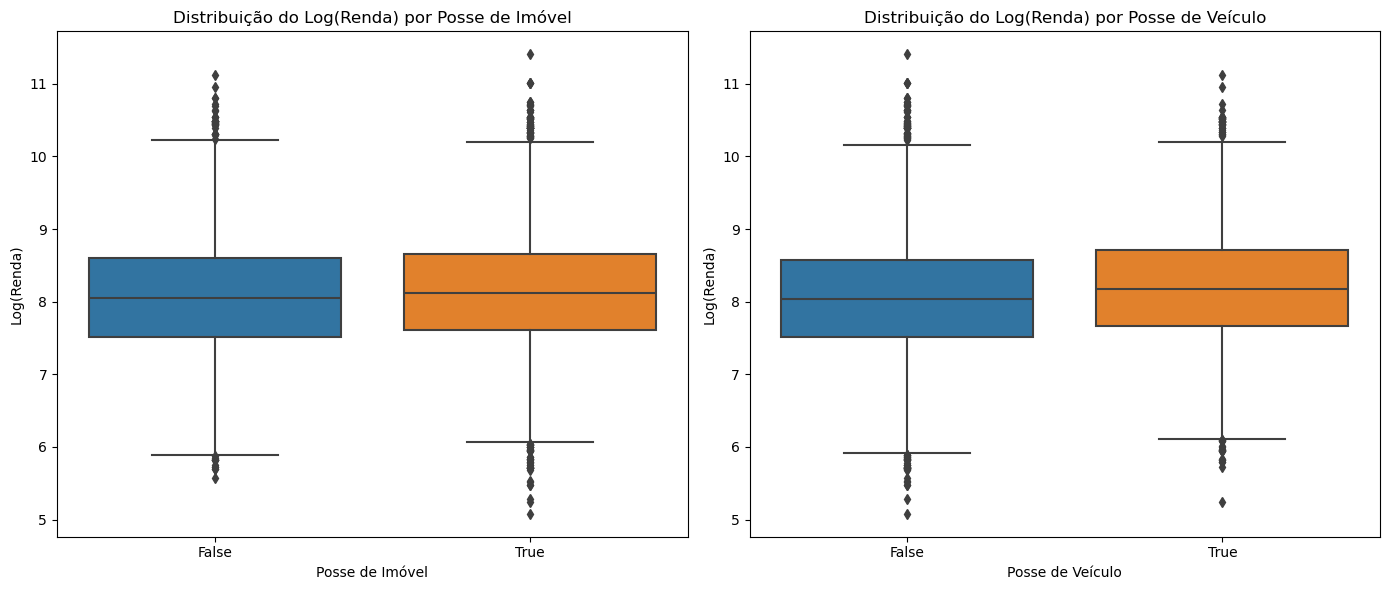

Teste t para Posse de Imóvel: t-statistic = 5.553, p-value = 0.000
Teste t para Posse de Veículo: t-statistic = 11.132, p-value = 0.000


In [26]:
from scipy import stats #para testes estatísticos e manipulação estatística de dados:

# Substituindo valores infinitos por NaN:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Calculando o logaritmo da variável 'renda':
df['log_renda'] = np.log1p(df['renda'])  # usando log1p para lidar com valores zero e evitar -inf

# Visualizando a distribuição da renda em função das variáveis qualitativas:
plt.figure(figsize=(14, 6))

# Gráfico de caixa para 'posse_de_imovel':
plt.subplot(1, 2, 1)
sns.boxplot(x='posse_de_imovel', y='log_renda', data=df)
plt.title('Distribuição do Log(Renda) por Posse de Imóvel')
plt.xlabel('Posse de Imóvel')
plt.ylabel('Log(Renda)')

# Gráfico de caixa para 'posse_de_veiculo':
plt.subplot(1, 2, 2)
sns.boxplot(x='posse_de_veiculo', y='log_renda', data=df)
plt.title('Distribuição do Log(Renda) por Posse de Veículo')
plt.xlabel('Posse de Veículo')
plt.ylabel('Log(Renda)')

plt.tight_layout()
plt.show()

# Teste t para 'posse_de_imovel':
imovel_grupos = df[['log_renda', 'posse_de_imovel']].dropna()
imovel_grupo1 = imovel_grupos[imovel_grupos['posse_de_imovel'] == 1]['log_renda']
imovel_grupo2 = imovel_grupos[imovel_grupos['posse_de_imovel'] == 0]['log_renda']
t_stat_imovel, p_val_imovel = stats.ttest_ind(imovel_grupo1, imovel_grupo2)

# Teste t para 'posse_de_veiculo':
veiculo_grupos = df[['log_renda', 'posse_de_veiculo']].dropna()
veiculo_grupo1 = veiculo_grupos[veiculo_grupos['posse_de_veiculo'] == 1]['log_renda']
veiculo_grupo2 = veiculo_grupos[veiculo_grupos['posse_de_veiculo'] == 0]['log_renda']
t_stat_veiculo, p_val_veiculo = stats.ttest_ind(veiculo_grupo1, veiculo_grupo2)

# Resultados dos testes:
print(f'Teste t para Posse de Imóvel: t-statistic = {t_stat_imovel:.3f}, p-value = {p_val_imovel:.3f}')
print(f'Teste t para Posse de Veículo: t-statistic = {t_stat_veiculo:.3f}, p-value = {p_val_veiculo:.3f}')


_____

### Testando com Pointplot:
Visualiza a média (com barras de erro) da renda para cada categoria

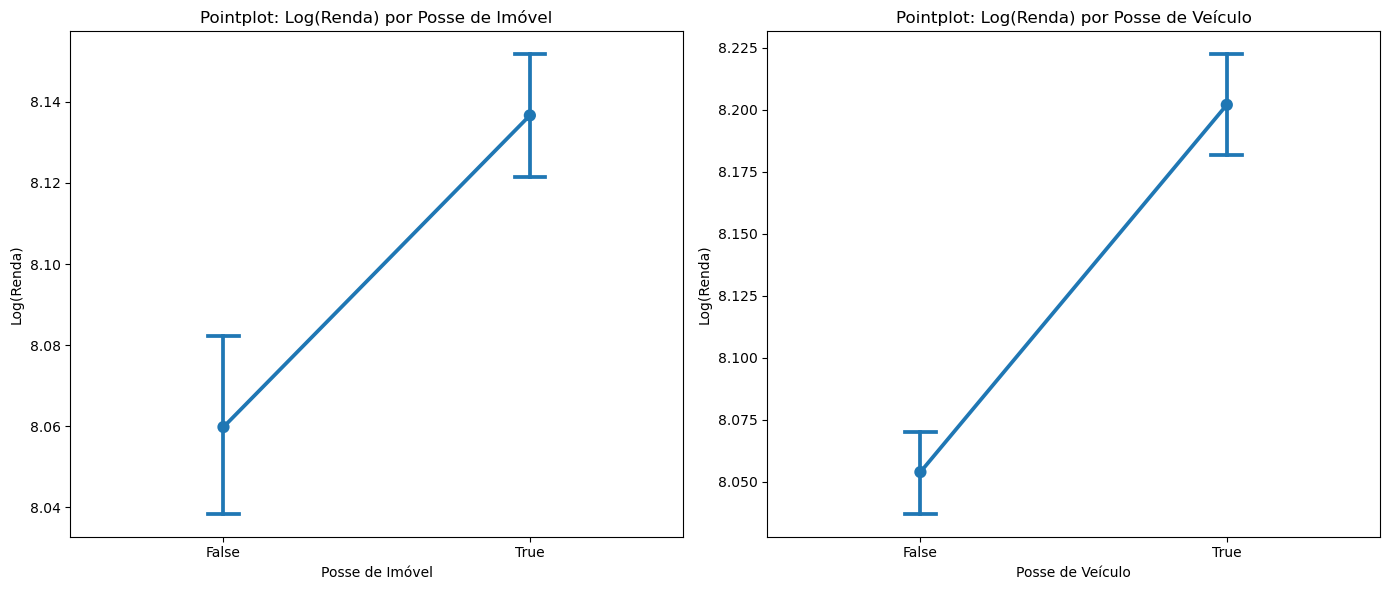

Teste t para Posse de Imóvel: t-statistic = 5.553, p-value = 0.000
Teste t para Posse de Veículo: t-statistic = 11.132, p-value = 0.000


In [28]:
# Substituindo valores infinitos por NaN:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Calculando o logaritmo da variável 'renda':
df['log_renda'] = np.log1p(df['renda'])  # usando log1p para lidar com valores zero e evitar -inf

# Visualizando a distribuição da renda em função das variáveis qualitativas (Pointplot):
plt.figure(figsize=(14, 6))

# Pointplot para 'posse_de_imovel':
plt.subplot(1, 2, 1)
sns.pointplot(x='posse_de_imovel', y='log_renda', data=df, capsize=.1)
plt.title('Pointplot: Log(Renda) por Posse de Imóvel')
plt.xlabel('Posse de Imóvel')
plt.ylabel('Log(Renda)')

# Pointplot para 'posse_de_veiculo':
plt.subplot(1, 2, 2)
sns.pointplot(x='posse_de_veiculo', y='log_renda', data=df, capsize=.1)
plt.title('Pointplot: Log(Renda) por Posse de Veículo')
plt.xlabel('Posse de Veículo')
plt.ylabel('Log(Renda)')

plt.tight_layout()
plt.show()

# Teste t para 'posse_de_imovel':
imovel_grupos = df[['log_renda', 'posse_de_imovel']].dropna()
imovel_grupo1 = imovel_grupos[imovel_grupos['posse_de_imovel'] == 1]['log_renda']
imovel_grupo2 = imovel_grupos[imovel_grupos['posse_de_imovel'] == 0]['log_renda']
t_stat_imovel, p_val_imovel = stats.ttest_ind(imovel_grupo1, imovel_grupo2)

# Teste t para 'posse_de_veiculo':
veiculo_grupos = df[['log_renda', 'posse_de_veiculo']].dropna()
veiculo_grupo1 = veiculo_grupos[veiculo_grupos['posse_de_veiculo'] == 1]['log_renda']
veiculo_grupo2 = veiculo_grupos[veiculo_grupos['posse_de_veiculo'] == 0]['log_renda']
t_stat_veiculo, p_val_veiculo = stats.ttest_ind(veiculo_grupo1, veiculo_grupo2)

# Resultados dos testes:
print(f'Teste t para Posse de Imóvel: t-statistic = {t_stat_imovel:.3f}, p-value = {p_val_imovel:.3f}')
print(f'Teste t para Posse de Veículo: t-statistic = {t_stat_veiculo:.3f}, p-value = {p_val_veiculo:.3f}')


____________

### Análises:

1. Podemos verificar que ambas as variáveis parecem discriminar renda de forma estatisticamente significativa. 
2. Principalmente quando levamos em conta a análise dos gráficos que concentram as médias no Pointplot.
3. Aumenta, assim, as chances de um crédito maior para aqueles que têm posse de veículo e/ou imóveis.